<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Handling-Text-in-Python" data-toc-modified-id="Handling-Text-in-Python-1">Handling Text in Python</a></span><ul class="toc-item"><li><span><a href="#Number-of-Characters-and-Words" data-toc-modified-id="Number-of-Characters-and-Words-1.1">Number of Characters and Words</a></span></li><li><span><a href="#Finding-Specific-Words" data-toc-modified-id="Finding-Specific-Words-1.2">Finding Specific Words</a></span></li><li><span><a href="#Finding-Unique-Words:-Using-set()" data-toc-modified-id="Finding-Unique-Words:-Using-set()-1.3">Finding Unique Words: Using set()</a></span></li></ul></li><li><span><a href="#Detecting-Spam-SMS-Messages" data-toc-modified-id="Detecting-Spam-SMS-Messages-2">Detecting Spam SMS Messages</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3">Exploratory Data Analysis</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-4">Data Visualization</a></span></li><li><span><a href="#Text-Processing" data-toc-modified-id="Text-Processing-5">Text Processing</a></span><ul class="toc-item"><li><span><a href="#Remove-Punctuation" data-toc-modified-id="Remove-Punctuation-5.1">Remove Punctuation</a></span></li><li><span><a href="#Remove-Stopwords" data-toc-modified-id="Remove-Stopwords-5.2">Remove Stopwords</a></span></li></ul></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-6">Vectorization</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-7">TF-IDF</a></span></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-8">Training the Model</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-9">Model Evaluation</a></span></li></ul></div>

## NLP Tasks with NLTK

In [37]:
# !conda install nltk

In [1]:
import nltk

In [2]:
# to get neccessary nltk packages
nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Counting vocabulary of words

In [4]:
text7

<Text: Wall Street Journal>

In [5]:
#one sentence from text7
sent7

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [6]:
#how many words in sent7? (number of tokens?)
len(sent7)

18

In [7]:
#how many tokens in the whole text7?
len(text7)

100676

In [8]:
#how many unique tokens in text7?
len(set(text7))

12408

In [9]:
#first 10 unique tokens?
list(set(text7))[:10]

['neat',
 'heads',
 'Sasaki',
 'can',
 'vintages',
 'objectionable',
 '12-member',
 'producers',
 'packages',
 'identity-management']

### Frequency of words

* **`FreqDist`**

In [42]:
dist = FreqDist(text7)
len(dist)
#the number of unique tokens

12408

Take the **`.keys()`** of the frequency distribution to get the tokens

In [43]:
vocab1 = dist.keys()
# In Python 3 dict.keys() returns an iterable view instead of a list
list(vocab1)[:10]

['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board']

How many times did the word `four` appear in text7?

In [12]:
dist['four']

20

In [50]:
# dist.items()

# returns (token,freqeuncy) dictionary

Print out the most 10 frequent (unique) words

In [52]:
order = sorted(dist.items(), key=lambda x: x[1], reverse = True)    
order[:10]

[(',', 4885),
 ('the', 4045),
 ('.', 3828),
 ('of', 2319),
 ('to', 2164),
 ('a', 1878),
 ('in', 1572),
 ('and', 1511),
 ('*-1', 1123),
 ('0', 1099)]

How many words are more than 5 letters AND appeared more at least 100 times in the text?

In [23]:
freqwords = [w for w in vocab1 if len(w) > 5 and dist[w] > 100]
freqwords

['billion',
 'company',
 'president',
 'because',
 'market',
 'million',
 'shares',
 'trading',
 'program']

### Tokenization
* **`nltk.word_tokenize(text)`**
* **`nltk.sent_tokenize(text)`** sentence tokenizer

In [34]:
text11 = "Children shouldn't drink a sugary drink before bed."
text11.split(' ')

['Children', "shouldn't", 'drink', 'a', 'sugary', 'drink', 'before', 'bed.']

In [29]:
nltk.word_tokenize(text11)

['Children',
 'should',
 "n't",
 'drink',
 'a',
 'sugary',
 'drink',
 'before',
 'bed',
 '.']

Notice `Shouldn't` is two words!

In [35]:
text12 = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!"
sentences = nltk.sent_tokenize(text12)
len(sentences)

4

In [36]:
sentences

['This is the first sentence.',
 'A gallon of milk in the U.S. costs $2.99.',
 'Is this the third sentence?',
 'Yes, it is!']

### Normalization and Stemming

**Normalizing**
* **`lower()`** un-capitalize words

In [28]:
input1 = "List listed lists listing listings"
words1 = input1.lower().split(' ')
words1

['list', 'listed', 'lists', 'listing', 'listings']

**Stemming**

Getting the roots of the words

* **`nltk.PorterStemmer()`**

In [29]:
porter = nltk.PorterStemmer()
[porter.stem(t) for t in words1]

['list', 'list', 'list', 'list', 'list']

### Lemmatization

In [33]:
#print first 20 words of UDHR corpus
udhr = nltk.corpus.udhr.words('English-Latin1')
udhr[:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

If you do Stemming here, you will find that not all tokens are meaningful words. Therefore, you can use **Lemmatization**

In [31]:
[porter.stem(t) for t in udhr[:20]] # Still Lemmatization

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inher',
 'digniti',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalien',
 'right',
 'of']

* **`nltk.WordNetLemmatizer()`**

In [32]:
WNlemma = nltk.WordNetLemmatizer()
[WNlemma.lemmatize(t) for t in udhr[:20]]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'right',
 'of']

### Remove Punctuation

Remove Punctuation using **`string`** library 

In [15]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [16]:
nopunc

'Sample message Notice it has punctuation'

### Remove Stopwords
Now remove *stopwords*

In [44]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [19]:
clean_mess = [word for word in nopunc.split() 
              if word.lower() not in stopwords.words('english')]

clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Now let's combine above code and write a function that removes **punctuation** and **stopwords**

In [20]:
def punc_stopwords(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() 
            if word.lower() not in stopwords.words('english')]

## Advanced NLP Tasks with NLTK

### Part-of-Speech (POS) tagging

| Tag | World Class | Tag | World Class |
|:---:|:-----------:|:---:|:-----------:|
|  CC | Conjunction |  NN |     Noun    |
|  CD |   Cardinal  | POS |  Possessive |
|  DT |  Determiner | PRP |   Pronoun   |
|  IN | Preposition |  RB |    Adverb   |
|  JJ |  Adjective  | SYM |    Symbol   |
|  MD |    Modal    |  VB |     Verb    |

In [33]:
nltk.help.upenn_tagset('MD')

MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would


* **`nltk.pos_tag`** to get the tag of each token

In [38]:
text11 = "Children shouldn't drink a sugary drink before bed."

text13 = nltk.word_tokenize(text11)
nltk.pos_tag(text13)

[('Children', 'NNP'),
 ('should', 'MD'),
 ("n't", 'RB'),
 ('drink', 'VB'),
 ('a', 'DT'),
 ('sugary', 'JJ'),
 ('drink', 'NN'),
 ('before', 'IN'),
 ('bed', 'NN'),
 ('.', '.')]

**Ambiguity in POS Tagging**

In some English sentences you cannot tell the meaning of the them because they can be interpreted in different ways

In [39]:
text14 = nltk.word_tokenize("Visiting aunts can be a nuisance")
nltk.pos_tag(text14)

[('Visiting', 'VBG'),
 ('aunts', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('nuisance', 'NN')]

### POS tagging ambiguity

In [43]:
text18 = nltk.word_tokenize("The old man the boat")
nltk.pos_tag(text18)

#you will get man as a noun which is not true

[('The', 'DT'), ('old', 'JJ'), ('man', 'NN'), ('the', 'DT'), ('boat', 'NN')]

In [41]:
text19 = nltk.word_tokenize("Colorless green ideas sleep furiously")
nltk.pos_tag(text19)

#well-formed sentences but meaningless

[('Colorless', 'NNP'),
 ('green', 'JJ'),
 ('ideas', 'NNS'),
 ('sleep', 'VBP'),
 ('furiously', 'RB')]

----------------------------
## Detecting Spam SMS Messages

The dataset we are using contains a collection of more than 5 thousand SMS phone messages. We’ll train a machine learning model to learn to discriminate between ham/spam messages automatically. Then, with a trained model, we’ll be able to classify arbitrary unlabeled messages as ham or spam.

In [1]:
import nltk

Read the messages, and use **`.rstrip()`** to get rid of any extra spaces before or after the entry

In [5]:
messages = [line.rstrip() for line in 
            open('SMSSpamCollection')]

In [6]:
print(len(messages))

5574


Print first 10 messages

In [7]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

We can tell from the output above that the first is *tab* separated 

In [5]:
import pandas as pd

In [6]:
messages = pd.read_csv('SMSSpamCollection',
                       sep='\t',names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Check messages length:

In [9]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization

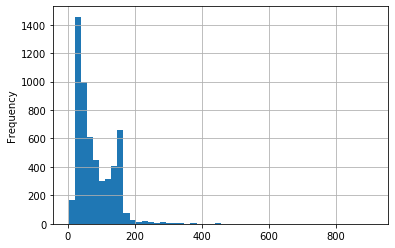

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


messages['length'].plot(kind='hist', bins=50)
plt.grid()
plt.show()

From the plot above, we see that some messages go up to 1000ish of length, which is so strange for a text message to be that long!

In [11]:
long_sms = messages['length'] > 200
messages[long_sms].message.count()

113

In [12]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Let's have a look on the message that has 910 characters!

In [13]:
messages[messages['length'] == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Let's find out if the message length is a feacture that distinguishes between ham and spam messages

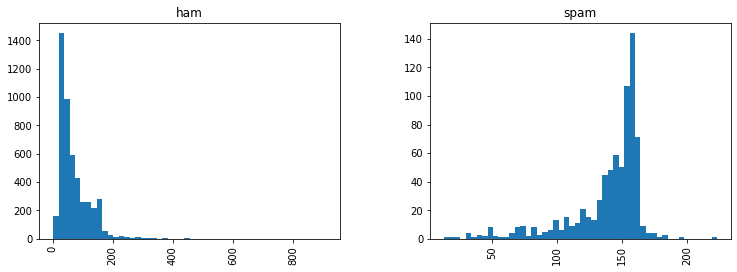

In [14]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))
plt.show()

Through just basic EDA we’ve been able to discover a trend that spam messages tend to have more characters

## Text Processing
### Remove Punctuation

Remove Punctuation using **`string`** library 

In [15]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [16]:
nopunc

'Sample message Notice it has punctuation'

### Remove Stopwords
Now remove *stopwords*

In [44]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [19]:
clean_mess = [word for word in nopunc.split() 
              if word.lower() not in stopwords.words('english')]

clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Now let's combine above code and write a function that removes **punctuation** and **stopwords**

In [20]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() 
            if word.lower() not in stopwords.words('english')]

This process of transferring text into a list of meaningful words is called **tokenization**

Let's try a sample before and after tekonization:

In [22]:
print(messages['message'].head(5))

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object


In [21]:
print(messages['message'].head(5).apply(text_process))

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object


## Vectorization

We need to transform the bag-of-words created above into a form that sklean can work with. The steps to perform that are as follows:

1. Count how many times does a word occur in each message (Known as term frequency)
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

This results in a matrix in which the rows are the words' counts (1 row per word), and the columns are the count of the presence of the word in each message (1 column per message).

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

Specify the **analyzer** to be our own previously defined function

In [24]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [25]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


Let's explore the vecotrization with one message

In [26]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [28]:
bow4 = bow_transformer.transform([message4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [29]:
print(bow4.shape)

(1, 11425)


This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [31]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


Let's apply the entire bag-of-words messages

In [32]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
messages_bow = bow_transformer.transform(messages['message'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [34]:
sparsity = (100.0 * messages_bow.nnz / 
            (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


## TF-IDF

TF-IDF stands for **term frequency-inverse document frequency**, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document’s relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**Term Frequency (TF):** Relative frequency of a term in a document
 = term instances / total terms

**Inverse Document Frequency (IDF):** Relative count of documents containing ther term
 = log_e(Total number of documents / Number of documents with term in it)

**Overall importance of a term =** TF * IDF

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

Let's see how it works with message4

In [36]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


What is the IDF (inverse document frequency) of the word "u" and of word "university"?

In [37]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [38]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


## Training the Model

Training will be done with **Naive Bayes**

In [39]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Try to predict our message4 to verify that the model is working

In [40]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


## Model Evaluation

In [41]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [42]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



For better evalaution, it is better to split the data into training and test sets ..